# Unit 5 - Financial Planning

In [74]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [75]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [76]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [77]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [78]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
# Fetch current ETH price
eth_price = requests.get(eth_url)

In [79]:
# Extract response / Retrieve output for BTC & ETH in order to get names of rows
btc_response = btc_price.content
eth_response = eth_price.content

# Convert output to JSON
btc_data = btc_price.json()
eth_data = eth_price.json()

In [80]:
# Fetch prices of both BTC and ETH in order to compute total value of crypto portfolio
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
total_btc_value = my_btc * btc_price
total_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${total_btc_value:0.2f}.")
print(f"The current value of your {my_eth} ETH is ${total_eth_value:0.2f}.")

The current value of your 1.2 BTC is $58824.00.
The current value of your 5.3 ETH is $17380.50.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [81]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [82]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [83]:
# Format current date as ISO format
today = pd.Timestamp("2021-08-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = today,
    end = today
    
).df

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                             open    high    low   close   volume    open   
time                                                                        
2021-08-18 00:00:00-04:00  115.94  116.03  115.8  115.96  3840678  442.96   

                                                              
                              high     low   close    volume  
time                                                          
2021-08-18 00:00:00-04:00  444.625  438.92  439.21  70093163

In [84]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.96
Current SPY closing price: $439.21


In [85]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21960.50
The current value of your 200 AGG shares is $23192.00


### Savings Health Analysis

In [86]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio_dictionary = {'Amount': [total_btc_value+total_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,76204.502
Shares,45152.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

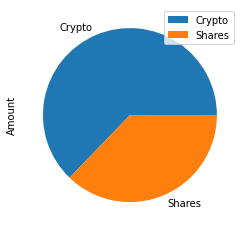

In [87]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [88]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [89]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-18', tz='America/New_York').isoformat()

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0     NaN   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0  243.11   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0  244.83   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0  246.73   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0  247.92   

                                                               
                             high     low   close      volume  
time                                                           
2017-08-28 00:00:00-04:00     NaN     NaN     NaN         NaN  
2017-08-29 00:00:00-04:00  245.15  242.93  244.85  40179210.0  
2017-08-30 00:00:00-04:00  246.32  244.62  246.04  40088765.0  
2017-08-31 00:00:00-04:00  247.77  246.61  247.42  52550897.0  
2017-09-01 00:00:00-04:00  248.33  247.67  247.88  39588857.0

In [91]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [92]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-08-28 00:00:00-04:00  110.17  110.24  110.10  110.170  2822250.0   
2017-08-29 00:00:00-04:00  110.48  110.49  110.26  110.330  1710077.0   
2017-08-30 00:00:00-04:00  110.27  110.33  110.24  110.290  1357572.0   
2017-08-31 00:00:00-04:00  110.31  110.46  110.31  110.435  4179400.0   
2017-09-01 00:00:00-04:00  110.19  110.22  109.91  109.960  2579681.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-08-28 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-08-29 00:00:00-04:00     0.001452  243.11  245.15  242.93  244.85   
2017-08-30 00:00:00-04:00    -0.000363  244.83  246.32  244.62  246.04   
2017-08-31 00:00:00-04:00     0.001315  246.73  247.77  246.61  247.42   
2017-09-01 00:00:00-04:00    -0.004301  247.92  248.33  247.67  247.88   

                                                    
                               volume daily_return  
time                                                
2017-08-28 00:00:00-04:00         NaN          NaN  
2017-08-29 00:00:00-04:00  40179210.0          NaN  
2017-08-30 00:00:00-04:00  40088765.0     0.004860  
2017-08-31 00:00:00-04:00  52550897.0     0.005609  
2017-09-01 00:00:00-04:00  39588857.0     0.001859

In [93]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013057,1.006245,0.989596,0.996654,1.010409,1.006189,1.000850,1.002287,0.994287,1.000262,...,1.002736,1.002127,1.004906,0.999428,1.001601,0.993849,1.008933,1.013940,0.993128,1.005761
2,1.028004,1.007265,0.992093,1.000733,1.008820,1.012256,1.006029,1.010561,0.999908,1.019454,...,0.990173,1.011075,1.010473,0.996835,1.009529,0.998763,1.014374,1.017762,0.983887,1.013322
3,1.044870,0.992686,0.999407,0.999229,1.011824,1.012387,1.017253,1.003970,1.005295,1.022879,...,0.988865,0.998654,1.004689,0.995822,1.019492,0.998437,1.009081,1.019138,0.986718,1.018971
4,1.043878,1.005642,0.999878,1.001051,1.017620,1.017980,1.021887,1.009649,0.997649,1.025287,...,0.987465,0.995404,0.992652,1.002897,1.014181,0.989637,1.002877,1.015215,0.998178,1.037581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.634189,20.979934,13.530537,9.373053,29.153020,11.485878,14.159458,66.435195,9.350635,36.277188,...,38.842744,21.477810,9.122794,31.906037,45.833255,24.993266,25.275339,21.241740,10.857449,8.247290
7557,23.615369,20.632947,13.553657,9.412153,29.024301,11.565115,14.104876,66.818097,9.352965,36.145712,...,38.603309,21.278045,9.119039,32.035074,45.803414,24.515430,25.574328,21.278703,10.838364,8.281761
7558,23.267244,20.530353,13.749082,9.313209,28.486965,11.445505,14.247517,67.301628,9.353999,36.109670,...,38.719870,21.680315,9.093005,32.000760,45.437131,24.449675,25.442385,21.232841,10.898587,8.252604
7559,23.262822,20.361620,13.618142,9.228679,28.482960,11.424070,14.397317,67.317408,9.346057,36.021670,...,39.083258,21.714077,9.083371,31.967208,45.532179,24.538582,25.090144,21.225971,10.978402,8.280890


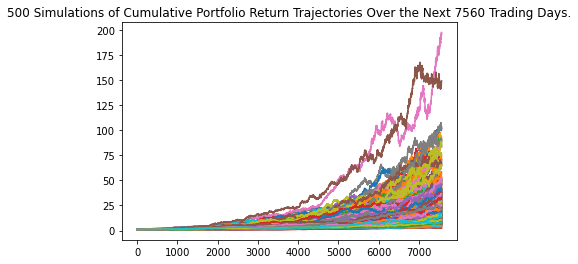

In [112]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

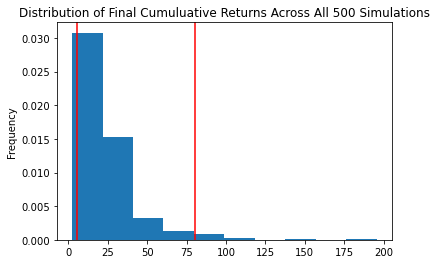

In [95]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             23.910160
std              19.413361
min               2.464613
25%              11.626776
50%              18.600714
75%              30.022187
max             195.385431
95% CI Lower      5.664420
95% CI Upper     80.038619
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [97]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $113288.4 and $1600772.38


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [98]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $169932.6 and $2401158.57


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [99]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [100]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011684,1.000173,0.986196,1.007034,1.001344,0.999612,1.002978,1.006868,0.993465,0.986801,...,1.014091,1.005109,0.993160,0.993528,0.994299,0.997344,0.985851,1.005223,1.019495,0.994812
2,1.010422,0.993164,0.988323,1.013548,0.991242,1.001728,1.011815,1.014910,1.000638,0.996726,...,1.003140,1.011514,0.992115,0.984112,0.992998,1.001263,0.991345,1.010530,1.028537,0.990702
3,1.000853,0.989601,1.007261,1.011738,1.004177,1.013457,0.999454,0.999365,1.001044,0.993794,...,1.008576,1.007817,0.972356,0.979721,0.998272,0.988625,1.004233,1.011176,1.043094,0.983861
4,0.994316,0.998761,1.013763,1.008705,1.000908,1.003319,1.003544,0.989566,0.998120,0.987507,...,1.023200,1.013529,0.968971,0.971826,1.010684,0.985836,0.997187,1.008347,1.053399,0.987578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.923353,1.255131,1.538524,1.150140,1.846352,1.329667,1.208353,1.257544,0.917000,1.368948,...,2.494771,2.639919,1.009359,1.121168,1.934261,1.860867,1.254632,1.701620,1.694096,1.878477
1257,2.934395,1.269579,1.551496,1.155559,1.830968,1.332135,1.195168,1.245759,0.923869,1.362981,...,2.517929,2.675724,1.008613,1.113949,1.912469,1.826025,1.263011,1.703025,1.694117,1.890041
1258,2.954993,1.267194,1.565962,1.156264,1.837994,1.332452,1.194280,1.243613,0.924953,1.342160,...,2.502780,2.693864,1.003581,1.120979,1.891605,1.803358,1.258797,1.690829,1.706291,1.868218
1259,2.941440,1.272691,1.561901,1.154661,1.858574,1.331598,1.197393,1.216721,0.929823,1.347755,...,2.512815,2.697988,1.005835,1.125932,1.864293,1.789403,1.249255,1.698549,1.704234,1.870283


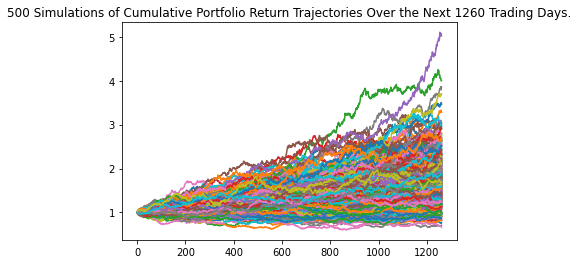

In [101]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

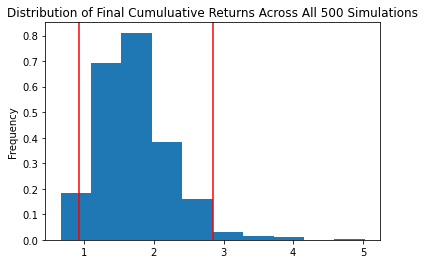

In [102]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.727356
std               0.526432
min               0.662767
25%               1.363234
50%               1.668298
75%               1.998356
max               5.027241
95% CI Lower      0.920679
95% CI Upper      2.850287
Name: 1260, dtype: float64


In [104]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55240.74 and $171017.22


### Ten Years Retirement Option

In [105]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [106]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998409,1.012079,1.011929,1.001311,0.993313,0.987705,1.019620,1.009691,1.005831,0.989781,...,0.998027,1.002667,0.999153,1.008749,1.008210,0.995821,1.000238,0.995414,0.997281,1.005916
2,0.995066,1.011890,1.010903,1.016849,1.003053,0.976223,1.022538,1.004985,1.000935,0.979839,...,1.010759,0.997265,0.994667,1.015173,1.016539,0.981424,1.001167,0.976715,0.998515,1.002759
3,0.989899,1.016654,1.011600,1.011570,1.013141,0.976507,1.043800,1.013797,1.005927,0.979615,...,1.024836,0.988109,0.984998,1.011861,1.025631,0.984579,1.005297,0.971956,0.997616,1.004886
4,0.983496,1.021503,1.013056,1.003651,1.003842,0.984296,1.035191,1.020910,1.008307,1.001233,...,1.018228,0.985927,0.990042,1.014818,1.037514,0.977716,1.015712,0.962933,0.991893,0.996116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.555966,2.054173,3.077362,2.817437,4.416128,2.451731,1.770570,2.754695,3.241873,1.924342,...,2.487812,3.950903,2.570680,1.976323,3.359527,2.197072,2.025329,2.560110,2.683140,4.125422
2517,1.529288,2.079802,3.100510,2.828996,4.398150,2.408953,1.766797,2.760150,3.201895,1.912664,...,2.470767,3.980164,2.601268,1.997330,3.368821,2.194542,2.011960,2.581382,2.681691,4.164335
2518,1.555792,2.102323,3.096476,2.835367,4.387781,2.407910,1.777610,2.798156,3.201208,1.919242,...,2.478436,4.042665,2.610333,1.995293,3.393005,2.205644,2.024758,2.578018,2.688050,4.138618
2519,1.546528,2.107017,3.078264,2.840677,4.292007,2.416483,1.788491,2.799618,3.201790,1.932283,...,2.463463,4.021553,2.610102,1.998630,3.374432,2.174556,2.003899,2.584316,2.654306,4.099398


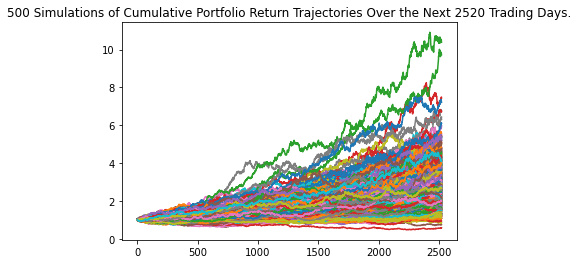

In [107]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

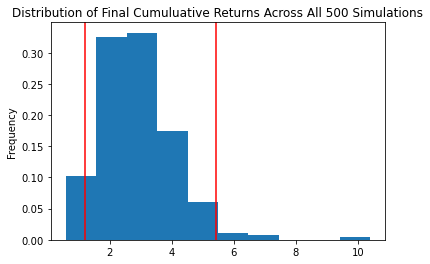

In [108]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [109]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.927726
std               1.201554
min               0.579916
25%               2.119678
50%               2.750437
75%               3.550188
max              10.391990
95% CI Lower      1.191041
95% CI Upper      5.416397
Name: 2520, dtype: float64


In [110]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71462.48 and $324983.84
